In [1]:
#Background
#Customer Service Requests Analysis

#NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service.
#Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars.
#These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. 
#The agency responds to the request, addresses it, and then closes it.

#Problem
#Perform a service request data analysis of New York City 311 calls. 
#You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
#Domain: Customer Service

#Task

#     Import a 311 NYC service request.
#     Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
#     Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
#     Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
#     Perform a statistical test for the following:

#     Whether the average response time across complaint types is similar or not (overall)
#     Are the type of complaint or service requested and location related?


from pandas import read_csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

%matplotlib inline

In [2]:
#read in data

dataset = read_csv("../../../ai_algos/data/311_Service_Requests_from_2010_to_Present.csv")
dataset.head()

C:\Users\jssrv\_programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
#check data types of data
dataset.dtypes
#dataset.info(null_counts=True)

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

In [4]:
#shape before drop NaN values
print(dataset.shape)

#see the Nan values
dataset.isnull().sum()

(300698, 53)


Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [5]:
#drop columns with too many Nan or unneeded

dataset.drop(columns=['Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2','Resolution Description', 
     'Resolution Action Updated Date','Community Board','X Coordinate (State Plane)','School or Citywide Complaint',
    'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name','School Name', 'School Number', 
              'School Region', 'School Code','School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found','Ferry Direction', 'Ferry Terminal Name','Unique Key','Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment','Landmark'],axis=1,inplace=True)

dataset.shape

(300698, 21)

In [6]:
#convert from object type to date type
dataset["Created Date"] = pd.to_datetime(dataset["Created Date"])
dataset["Closed Date"] = pd.to_datetime(dataset["Closed Date"])

dataset["Request_closing_time"] = dataset["Closed Date"].sub(dataset["Created Date"],fill_value=0)

dataset.head(10)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Address Type,City,...,Status,Due Date,Borough,Y Coordinate (State Plane),Park Facility Name,Park Borough,Latitude,Longitude,Location,Request_closing_time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,ADDRESS,NEW YORK,...,Closed,01-01-16 7:59,MANHATTAN,254678.0,Unspecified,MANHATTAN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",00:55:15
1,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ADDRESS,ASTORIA,...,Closed,01-01-16 7:59,QUEENS,221986.0,Unspecified,QUEENS,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",01:26:16
2,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,ADDRESS,BRONX,...,Closed,01-01-16 7:59,BRONX,256380.0,Unspecified,BRONX,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",04:51:31
3,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,ADDRESS,BRONX,...,Closed,01-01-16 7:57,BRONX,243899.0,Unspecified,BRONX,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",07:45:14
4,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ADDRESS,ELMHURST,...,Closed,01-01-16 7:56,QUEENS,206375.0,Unspecified,QUEENS,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",03:27:02
5,2015-12-31 23:56:30,2016-01-01 01:50:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11215.0,ADDRESS,BROOKLYN,...,Closed,01-01-16 7:56,BROOKLYN,180032.0,Unspecified,BROOKLYN,40.660823,-73.992568,"(40.66082272389114, -73.99256786342693)",01:53:30
6,2015-12-31 23:55:32,2016-01-01 01:53:00,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10032.0,ADDRESS,NEW YORK,...,Closed,01-01-16 7:55,MANHATTAN,245627.0,Unspecified,MANHATTAN,40.840848,-73.937375,"(40.840847591440415, -73.9373750864581)",01:57:28
7,2015-12-31 23:54:05,2016-01-01 01:42:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10457.0,ADDRESS,BRONX,...,Closed,01-01-16 7:54,BRONX,244417.0,Unspecified,BRONX,40.837503,-73.902905,"(40.83750262540012, -73.90290517326568)",01:47:55
8,2015-12-31 23:53:58,2016-01-01 08:27:00,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11415.0,ADDRESS,KEW GARDENS,...,Closed,01-01-16 7:53,QUEENS,196163.0,Unspecified,QUEENS,40.704977,-73.832605,"(40.704977164399935, -73.8326047502584)",08:33:02
9,2015-12-31 23:53:58,2016-01-01 01:17:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,ADDRESS,BROOKLYN,...,Closed,01-01-16 7:53,BROOKLYN,166541.0,Unspecified,BROOKLYN,40.623793,-73.999539,"(40.623793065806524, -73.99953890121567)",01:23:02


In [7]:
#
dataset.isnull().sum()

Created Date                       0
Closed Date                     2164
Agency                             0
Agency Name                        0
Complaint Type                     0
Descriptor                      5914
Location Type                    131
Incident Zip                    2615
Address Type                    2815
City                            2614
Landmark                      300349
Facility Type                   2171
Status                             0
Due Date                           3
Borough                            0
Y Coordinate (State Plane)      3540
Park Facility Name                 0
Park Borough                       0
Latitude                        3540
Longitude                       3540
Location                        3540
Request_closing_time               0
dtype: int64

In [15]:
#Complaint type breakdown to figure out majority of complaint types and top 10 complaints

dataset['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(15,30))
plt.show()

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64

In [ ]:
dataset['Complaint Type'].value_counts()[0:10,]

In [16]:
#view the status of tickets

dataset['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [10]:
#group by datasets by complaintss to display plots against the city

dataset_complaints = dataset.groupby("Complaint Type")
dataset_driveway = dataset_complaints.get_group("Blocked Driveway")

print(dataset_driveway.shape)

(77044, 22)


[Text(0, 0, 'Noise - Street/Sidewalk'),
 Text(0, 0, 'Blocked Driveway'),
 Text(0, 0, 'Illegal Parking'),
 Text(0, 0, 'Derelict Vehicle'),
 Text(0, 0, 'Noise - Commercial'),
 Text(0, 0, 'Noise - House of Worship'),
 Text(0, 0, 'Posting Advertisement'),
 Text(0, 0, 'Noise - Vehicle'),
 Text(0, 0, 'Animal Abuse'),
 Text(0, 0, 'Vending'),
 Text(0, 0, 'Traffic'),
 Text(0, 0, 'Drinking'),
 Text(0, 0, 'Bike/Roller/Skate Chronic'),
 Text(0, 0, 'Panhandling'),
 Text(0, 0, 'Noise - Park'),
 Text(0, 0, 'Homeless Encampment'),
 Text(0, 0, 'Urinating in Public'),
 Text(0, 0, 'Graffiti'),
 Text(0, 0, 'Disorderly Youth'),
 Text(0, 0, 'Illegal Fireworks'),
 Text(0, 0, 'Ferry Complaint'),
 Text(0, 0, 'Agency Issues'),
 Text(0, 0, 'Squeegee'),
 Text(0, 0, 'Animal in a Park')]

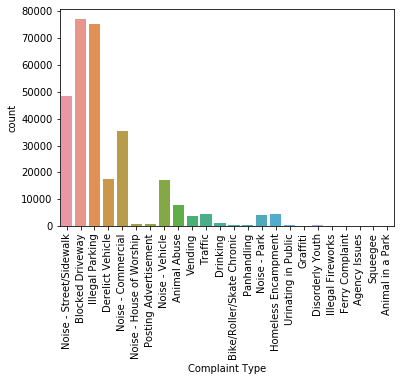

In [19]:
#Plot a bar graph of count vs. complaint types
plot3=sns.countplot(dataset['Complaint Type'])
plot3.set_xticklabels(plot3.get_xticklabels(),rotation =90)

(-74.28705408181048,
 -73.66864350818952,
 40.473923122966056,
 40.938080297033935)

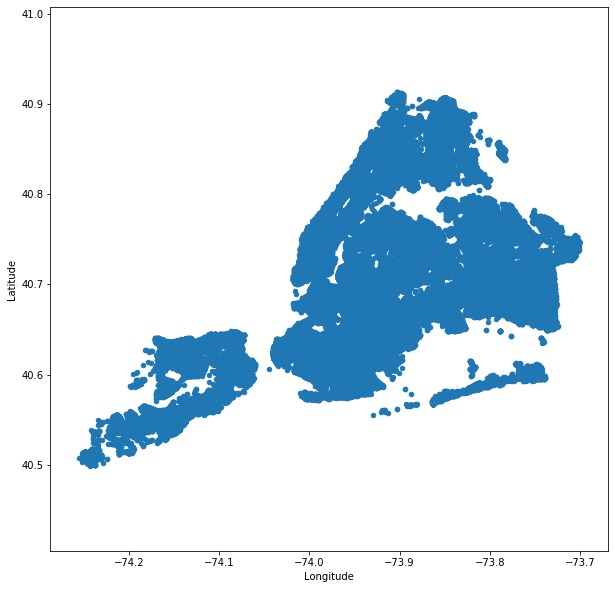

In [11]:
#graph the data to see the locations on the map
dataset[['Longitude', 'Latitude']].plot(kind='scatter',
    x='Longitude', y='Latitude', figsize=(10,10)).axis('equal')

(-74.28426804417784, -73.6721141036368, 40.47666130256329, 40.93519573764949)

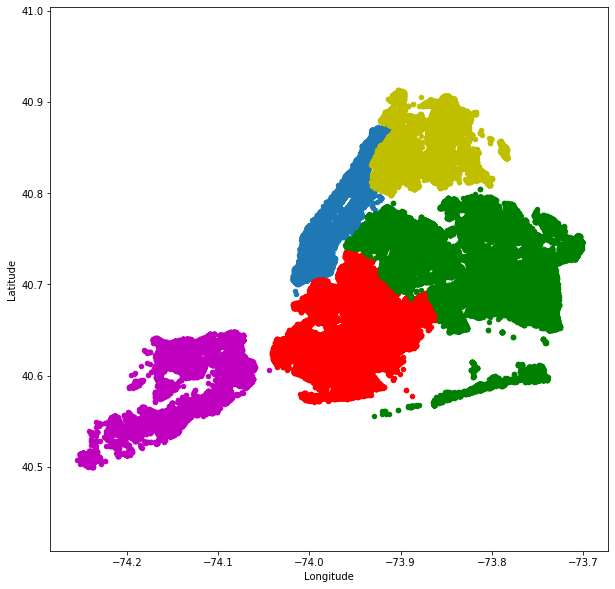

In [12]:
#differentiate by color
f, ax = plt.subplots()
dataset[dataset['Borough'] == 'MANHATTAN'][['Longitude', 'Latitude']].plot(kind='scatter', x='Longitude', y='Latitude', ax=ax, figsize=(10,10)).axis('equal')
dataset[dataset['Borough'] == 'BROOKLYN'][['Longitude', 'Latitude']].plot(kind='scatter', ax=ax, x='Longitude', y='Latitude', color='r', figsize=(10,10)).axis('equal')
dataset[dataset['Borough'] == 'QUEENS'][['Longitude', 'Latitude']].plot(kind='scatter', ax=ax, x='Longitude', y='Latitude', color='g', figsize=(10,10)).axis('equal')
dataset[dataset['Borough'] == 'BRONX'][['Longitude', 'Latitude']].plot(kind='scatter', ax=ax, x='Longitude', y='Latitude', color='y', figsize=(10,10)).axis('equal')
dataset[dataset['Borough'] == 'STATEN ISLAND'][['Longitude', 'Latitude']].plot(kind='scatter', ax=ax, x='Longitude', y='Latitude', color='m', figsize=(10,10)).axis('equal')

(-74.25493722055418, -73.70076036944582, 40.49913462, 40.9128688)

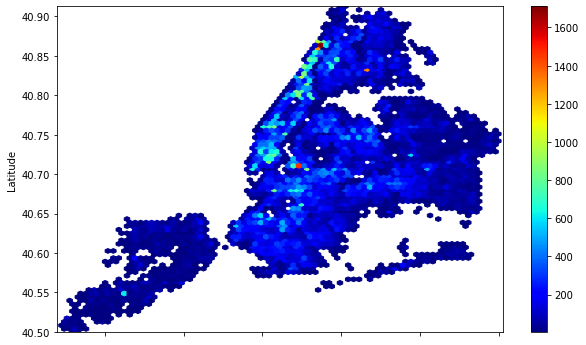

In [13]:
#view density of calls on the map
dataset[['Longitude', 'Latitude']].plot(kind='hexbin',
    x='Longitude', y='Latitude', mincnt=1, gridsize=80, colormap='jet', figsize=(10,6)).axis('equal')